### 파이썬 머신러닝
## 텍스트 데이터 다루기
---
# IMDb 리뷰 - 여러 단어로 만든 BOW (n-gram)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
imdb_train, imdb_test = np.load('imdb.npy')

text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
y_train = imdb_train.target

### 여러 단어로 만든 BOW (n-gram)
- 연속된 여러 단어를 하나로 취급
- 단어(token) 하나 uni-gram, 단어 두개 bi-gram, 단어 세개 tri-gram, 단어 n개 n-gram
- ngram_range=[token_min, token_max] 옵션을 사용하는데, 메모리 에러가 발생할 수 있다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2))
X_train = vect.fit_transform(text_train)

- 단어집 확인

In [4]:
type(vect.vocabulary_), len(vect.vocabulary_)

(dict, 1522634)

In [11]:
count = 0
for key, value in vect.vocabulary_.items():
    #value = vect.vocabulary_[key]
    if len(key.split())>1:
        print(key, value)
        count += 1
    if count>=100: break
    

zero day 1520834
day leads 336192
leads you 753163
you to 1516060
to think 1359588
think even 1330822
even re 434458
re think 1066618
think why 1331417
why two 1477446
two boys 1387196
boys young 198116
young men 1516894
men would 829363
would do 1504371
do what 376359
what they 1462273
they did 1327486
did commit 359052
commit mutual 286423
mutual suicide 875103
suicide via 1254651
via slaughtering 1422933
slaughtering their 1186860
their classmates 1316531
classmates it 270748
it captures 699350
captures what 234461
what must 1461706
must be 874228
be beyond 147994
beyond bizarre 174321
bizarre mode 180315
mode of 845863
of being 919212
being for 164359
for two 504219
two humans 1387770
humans who 640029
who have 1473169
have decided 588492
decided to 341231
to withdraw 1360315
withdraw from 1492377
from common 518090
common civility 286699
civility in 268214
in order 659486
order to 958117
to define 1353681
define their 343674
their own 1318136
own mutual 973731
mutual world 875108


In [12]:
count = 0
for i, (key, value) in enumerate(vect.vocabulary_.items()):
    #value = vect.vocabulary_[key]
    if len(key.split())>1:
        print(i, key, value)
        count += 1
    if count>=100: break
    

91 zero day 1520834
92 day leads 336192
93 leads you 753163
94 you to 1516060
95 to think 1359588
96 think even 1330822
97 even re 434458
98 re think 1066618
99 think why 1331417
100 why two 1477446
101 two boys 1387196
102 boys young 198116
103 young men 1516894
104 men would 829363
105 would do 1504371
106 do what 376359
107 what they 1462273
108 they did 1327486
109 did commit 359052
110 commit mutual 286423
111 mutual suicide 875103
112 suicide via 1254651
113 via slaughtering 1422933
114 slaughtering their 1186860
115 their classmates 1316531
116 classmates it 270748
117 it captures 699350
118 captures what 234461
119 what must 1461706
120 must be 874228
121 be beyond 147994
122 beyond bizarre 174321
123 bizarre mode 180315
124 mode of 845863
125 of being 919212
126 being for 164359
127 for two 504219
128 two humans 1387770
129 humans who 640029
130 who have 1473169
131 have decided 588492
132 decided to 341231
133 to withdraw 1360315
134 withdraw from 1492377
135 from common 5180

In [13]:
count=0
for i, (key, value) in enumerate(vect.vocabulary_.items()):
    #value = vect.vocabulary_[key]
    print(i, key, value)
    count += 1
    if count>=100: break

0 zero 1520800
1 day 335833
2 leads 752939
3 you 1514411
4 to 1351613
5 think 1330593
6 even 432766
7 re 1065583
8 why 1476710
9 two 1387034
10 boys 197829
11 young 1516285
12 men 828779
13 would 1504107
14 do 375409
15 what 1460602
16 they 1327051
17 did 358899
18 commit 286394
19 mutual 875066
20 suicide 1254516
21 via 1422846
22 slaughtering 1186849
23 their 1316009
24 classmates 270738
25 it 698643
26 captures 234403
27 must 874192
28 be 147634
29 beyond 174295
30 bizarre 180159
31 mode 845837
32 of 917907
33 being 163650
34 for 499074
35 humans 639890
36 who 1472117
37 have 587857
38 decided 341187
39 withdraw 1492375
40 from 517274
41 common 286670
42 civility 268211
43 in 654558
44 order 958004
45 define 343650
46 own 972975
47 world 1501186
48 coupled 311111
49 destruction 353846
50 is 687908
51 not 903720
52 perfect 992871
53 movie 861690
54 but 214578
55 given 545107
56 money 848624
57 time 1346692
58 the 1294444
59 filmmaker 481824
60 and 66986
61 actors 27116
62 had 572635


In [15]:
fn = np.array(vect.get_feature_names())

In [17]:
fn.nbytes

542057704

In [18]:
fn[::100000]

array(['00', 'appreciating the', 'brazil minha', 'contessa',
       'early actresses', 'for cheap', 'heist thing', 'it disheartening',
       'mainly related', 'nobody writes', 'pheobe buffay', 'rifle much',
       'solved and', 'the doorstep', 'unintelligible half',
       'work optimally'], dtype='<U89')

- 학습

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2))
X_train = vect.fit_transform(text_train)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(C=10), X_train, y_train)
scores

array([0.88660907, 0.89404848, 0.89354297])

>확인문제<br>
>- 단어수를 3개로 늘려서 테스트
>- Tfidf 를 적용해서 테스트 (단어수는 2개)

In [21]:
vect = CountVectorizer(ngram_range=(1,3))
X_train = vect.fit_transform(text_train)

In [22]:
scores = cross_val_score(LogisticRegression(C=10), X_train, y_train)
scores

array([0.88420926, 0.89392849, 0.89162266])

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train)

In [24]:
scores = cross_val_score(LogisticRegression(C=10), X_train_tfidf, y_train)
scores

array([0.88972882, 0.89440845, 0.89222276])

- 계수 조사를 위해 모델을 만든다
- <font color="red">아래 분류 작업은 시간이 오래 걸린다</font>

In [29]:
vect = CountVectorizer(ngram_range=(1,2))
X_train = vect.fit_transform(text_train)

model = LogisticRegression(C=10) # 교재 414 쪽 참조
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
text_test = [s.decode().replace('<br />', '') for s in imdb_test.data]
y_test = imdb_test.target

In [31]:
X_test = vect.transform(text_test)

In [32]:
model.score(X_test, y_test)

0.89516

In [33]:
model.coef_[0].shape

(1522634,)

In [34]:
model.coef_[0].max()

1.7093667460509927

In [35]:
model.coef_[0].min()

-2.1576467734795717

In [37]:
w = model.coef_[0]
w_sorted = np.sort(w)
w_sorted[:10]

array([-2.15764677, -2.01451717, -1.92585982, -1.78796949, -1.68226864,
       -1.52872766, -1.49864179, -1.4969313 , -1.47670057, -1.40364534])

(-2.5, 0)

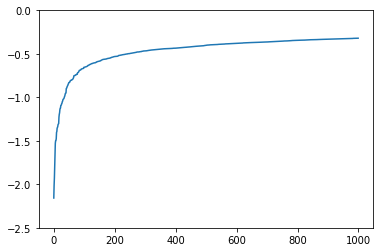

In [43]:
plt.plot(w_sorted[:1000])
plt.ylim(-2.5,0)

(0, 2)

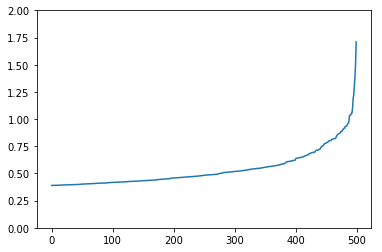

In [39]:
plt.plot(w_sorted[-500:])
plt.ylim(0,2)

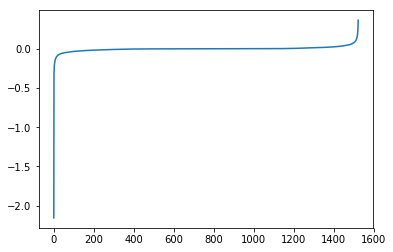

In [40]:
plt.plot(w_sorted[::1000])

- argsort()

In [21]:
nums = np.random.randint(0, 100, size=5)
nums

array([41,  3,  4, 25, 68])

In [22]:
np.sort(nums)

array([ 3,  4, 25, 41, 68])

In [23]:
np.argsort(nums)

array([1, 2, 3, 0, 4], dtype=int64)

In [27]:
fn[100000]

'appreciating the'

In [28]:
w[100000]

0.0035644911195093494

In [29]:
w_sort_pos = np.argsort(w)
w_sort_pos[-10:]

array([ 874526,  560682,  665584,  203000,   59411,  420060, 1256852,
       1496779,  992871,  442156], dtype=int64)

In [30]:
fn[442156] # 가중치가 가장 높은 속성 이름

'excellent'

In [31]:
w_sort_pos[:10]

array([1502853,  133566,  192467, 1444769,  368303, 1281490, 1020318,
       1019538,  368109, 1502420], dtype=int64)

In [32]:
fn[1502853] # 가중치가 가장 낮은 속성 이름

'worst'

In [35]:
pos

array([1502853,  133566,  192467, 1444769,  368303, 1281490, 1020318,
       1019538,  368109, 1502420, 1314941,  742230,  630495,  394928,
        907226,  831897,  743709,  131835, 1124320, 1451179,  866422,
        344355,     395,  523326,  172526, 1079245, 1062135, 1497381,
       1456018, 1360601,  874526,  560682,  665584,  203000,   59411,
        420060, 1256852, 1496779,  992871,  442156], dtype=int64)

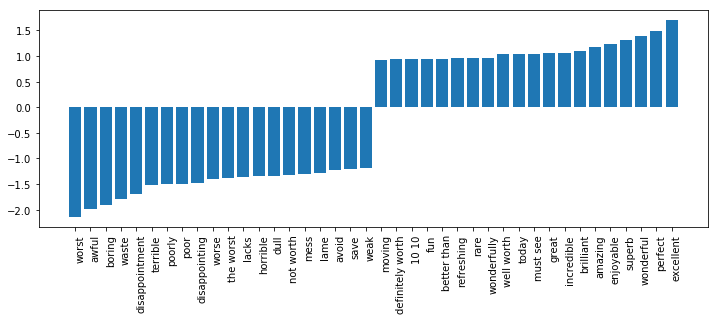

In [39]:
w = model.coef_[0]
indexer = w.argsort()

pos = np.r_[indexer[:20],indexer[-20:]]

plt.figure(figsize=[12,4])
plt.bar(range(40),w[pos])
plt.xticks(range(40), fn[pos], rotation=90, ha='left')
print('')

In [48]:
#mask = (np.array([len(s.split(' ')) for s in fn]) == 2)
mask = np.array([s.find(' ')>=0 for s in fn])

In [49]:
w2 = w[mask]
indexer = w2.argsort()

In [50]:
fn2 = fn[mask]

array(['00 01', '00 after', '00 alison', '00 am', '00 and', '00 at',
       '00 back', '00 bin', '00 budget', '00 but'], dtype='<U89')

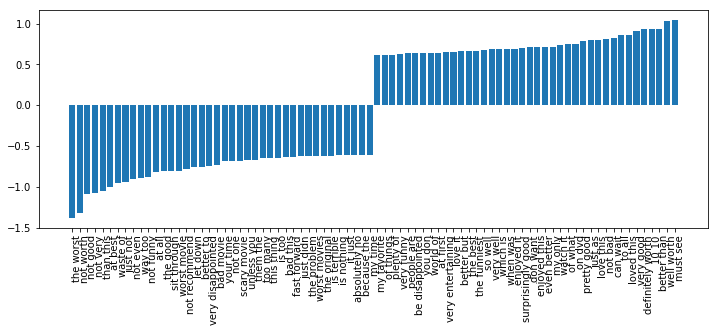

In [60]:
plt.figure(figsize=[12,4])
plt.bar(range(80),w2[np.r_[indexer[:40],indexer[-40:]]])
plt.xticks(range(80), fn2[np.r_[indexer[:40],indexer[-40:]]], rotation=90, ha='left')
print('')

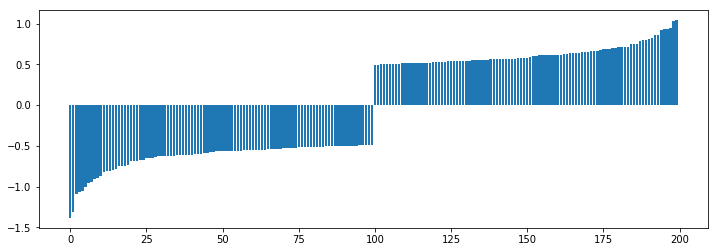

In [52]:
plt.figure(figsize=[12,4])
plt.bar(range(200),w2[np.r_[indexer[:100],indexer[-100:]]])
#plt.xticks(range(80), fn2[np.r_[indexer[:40],indexer[-40:]]], rotation=90, ha='left')
print('')